# Explore here

1- Recopilacion de datos Y definicion del problema. Que datos estan relacionados o afectan el precio de los Airbnb?, el tipo de inmueble?, el grupo inmobiliario? o las vistas que tienen los Airbnb.


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/workspaces/machine-learning-python-template/data/raw/AB_NYC_2019.csv")

#print(data.columns)
print(data.shape)

data.describe()



(48895, 16)


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


-Existen valores 0 en los valores minimos del precio, y en la disponibilidad que pueden afectar nuestro analisis. Se deben eliminar. Esto es muy necesario en caso de querer hacer analisis predictivos con los datos.

2- Limpieza de datos, y exploracion.

En este caso, es necesario eliminar los datos que contengan 0 en el precio, no existen rentas de inmuebles en 0 dolares o 0 pesos. Al eliminar los los ceros nos aseguramos de que el minimo de disponibilidad sea 1, y el precio no sea cero. 

In [2]:
 # Elimina las filas donde price == 0 o availability_365 == 0:
data = data[(data['price'] != 0) & (data['availability_365'] != 0)].reset_index(drop=True)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31354 entries, 0 to 31353
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              31354 non-null  int64  
 1   name                            31350 non-null  object 
 2   host_id                         31354 non-null  int64  
 3   host_name                       31346 non-null  object 
 4   neighbourhood_group             31354 non-null  object 
 5   neighbourhood                   31354 non-null  object 
 6   latitude                        31354 non-null  float64
 7   longitude                       31354 non-null  float64
 8   room_type                       31354 non-null  object 
 9   price                           31354 non-null  int64  
 10  minimum_nights                  31354 non-null  int64  
 11  number_of_reviews               31354 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.135400e+04,3.135400e+04,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,26147.000000,31354.000000,31354.000000
mean,2.100493e+07,8.145071e+07,40.728406,-73.948753,162.091822,8.338426,31.849365,1.810063,10.335460,175.834439
std,1.148777e+07,8.673941e+07,0.056562,0.051400,254.444750,23.838961,51.638559,1.805657,40.705488,126.195374
min,2.539000e+03,2.571000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,1.000000
25%,1.167354e+07,8.619004e+06,40.688392,-73.983280,70.000000,2.000000,2.000000,0.450000,1.000000,55.000000
50%,2.255750e+07,4.108975e+07,40.723725,-73.954115,112.000000,3.000000,10.000000,1.230000,1.000000,168.000000
75%,3.119452e+07,1.452368e+08,40.763037,-73.930152,189.000000,5.000000,39.000000,2.680000,3.000000,305.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


-Eliminamos datos irrelevantes para nuestro analisis y duplicados.

In [3]:
#Datos duplicados por columna
duplicados_por_columna = data.apply(lambda x: x.duplicated().sum())
print(duplicados_por_columna)
data.drop(["id", "name", "host_name", "last_review","reviews_per_month"], axis = 1, inplace = True)

id                                    0
name                                476
host_id                            9546
host_name                         23140
neighbourhood_group               31349
neighbourhood                     31136
latitude                          15317
longitude                         17990
room_type                         31351
price                             30710
minimum_nights                    31255
number_of_reviews                 30966
last_review                       30137
reviews_per_month                 30424
calculated_host_listings_count    31307
availability_365                  30989
dtype: int64


En este caso, al ser categorias puede haber datos duplicados, lo importante es que no haya ids duplicadas. host_id puede tener duplicados por que podrian tener registros multiples los propietarios.

In [4]:
data.head()


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129


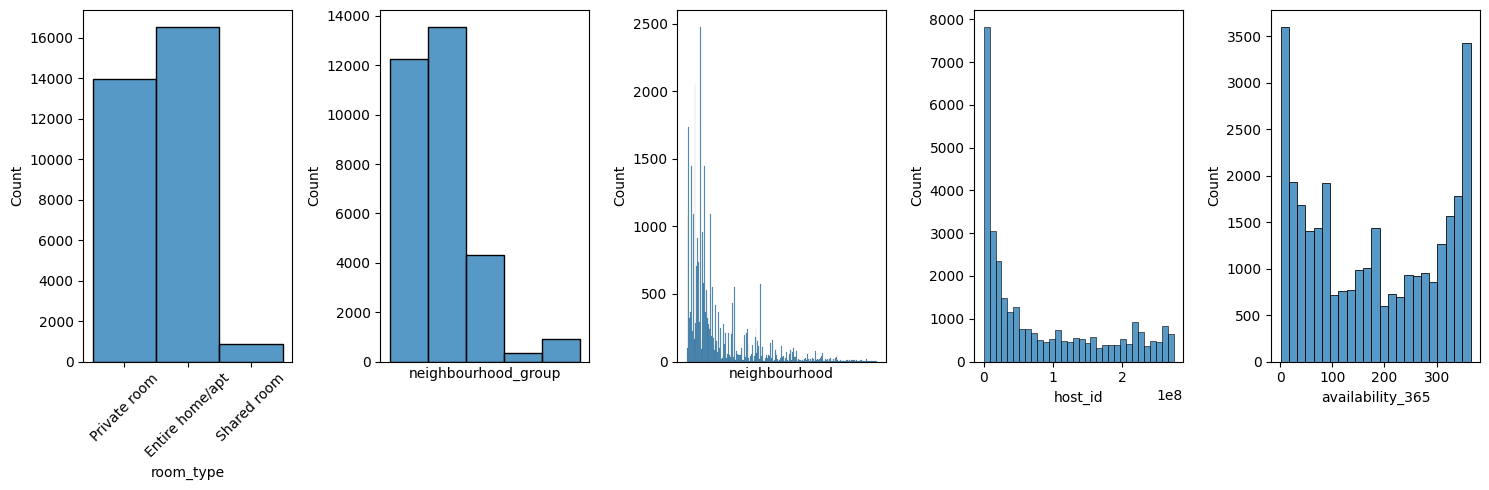

In [5]:
#Analisis de variables categoricas
# Visualización de variables categóricas

fig, axis = plt.subplots(1, 5, figsize=(15, 5))  # 1 fila, 3 columnas

sns.histplot(ax=axis[0], data=data, x="room_type")
axis[0].tick_params(axis='x', rotation=45)

sns.histplot(ax=axis[1], data=data, x="neighbourhood_group").set_xticks([])
sns.histplot(ax=axis[2], data=data, x="neighbourhood").set_xticks([])
sns.histplot(ax = axis[3], data = data, x = "host_id")
sns.histplot(ax = axis[4], data = data, x = "availability_365")

plt.tight_layout()
plt.show()# Guarda imagen


-Existen mas casas completas que cuartos compartidos o cuartos privados.

-Hay mas airbnb dependiendo del grupo.

-Existen varios propietarios que rentan mas de un inmueble.

-Hay casi igual numero de casas disponibles en menos de 30 dias que casas con disponibilidad completa de 365 dias.

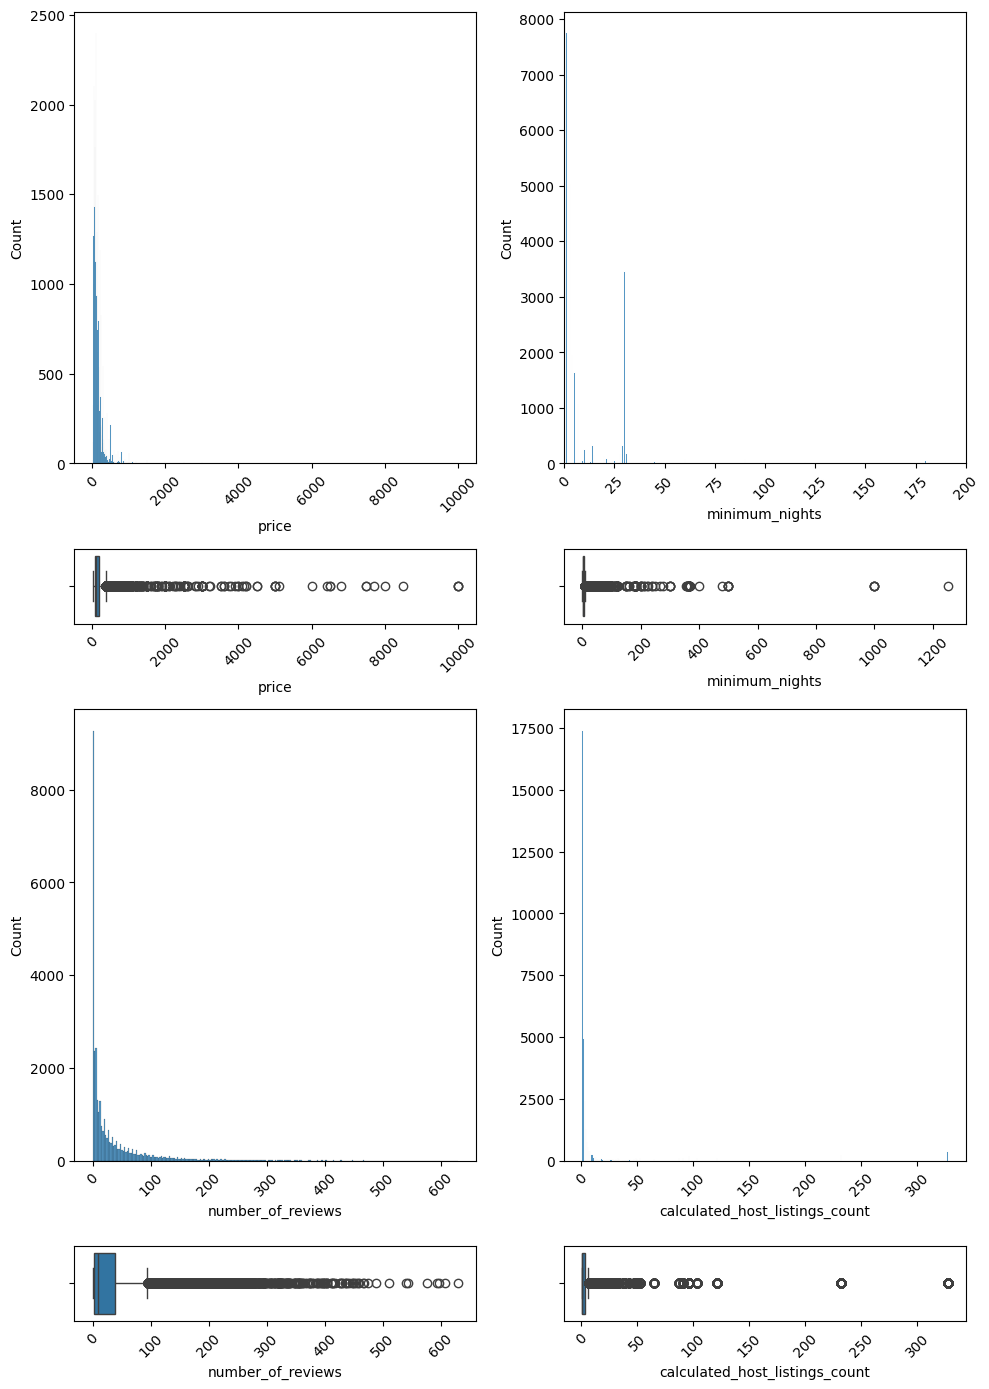

In [6]:
# Visualización de variables numéricas (histogramas)
# Crear el grid de subgráficas
fig, axis = plt.subplots(4, 2, figsize=(10, 14), gridspec_kw={"height_ratios": [6, 1, 6, 1]})

# Histograma y boxplot para 'price'
sns.histplot(ax=axis[0, 0], data=data, x="price")
sns.boxplot(ax=axis[1, 0], data=data, x="price")

# Ajustar límites y rotación de etiquetas para 'minimum_nights'
sns.histplot(ax=axis[0, 1], data=data, x="minimum_nights").set_xlim(0, 200)
sns.boxplot(ax=axis[1, 1], data=data, x="minimum_nights")

# Histograma y boxplot para 'number_of_reviews'
sns.histplot(ax=axis[2, 0], data=data, x="number_of_reviews")
sns.boxplot(ax=axis[3, 0], data=data, x="number_of_reviews")

# Histograma y boxplot para 'calculated_host_listings_count'
sns.histplot(ax=axis[2, 1], data=data, x="calculated_host_listings_count")
sns.boxplot(ax=axis[3, 1], data=data, x="calculated_host_listings_count")

# Ajustar la rotación de las etiquetas del eje X
for ax in axis.flat:
    ax.tick_params(axis='x', rotation=45)

# Ajustar layout para evitar solapamientos
plt.tight_layout()

# Mostrar la gráfica
plt.show()



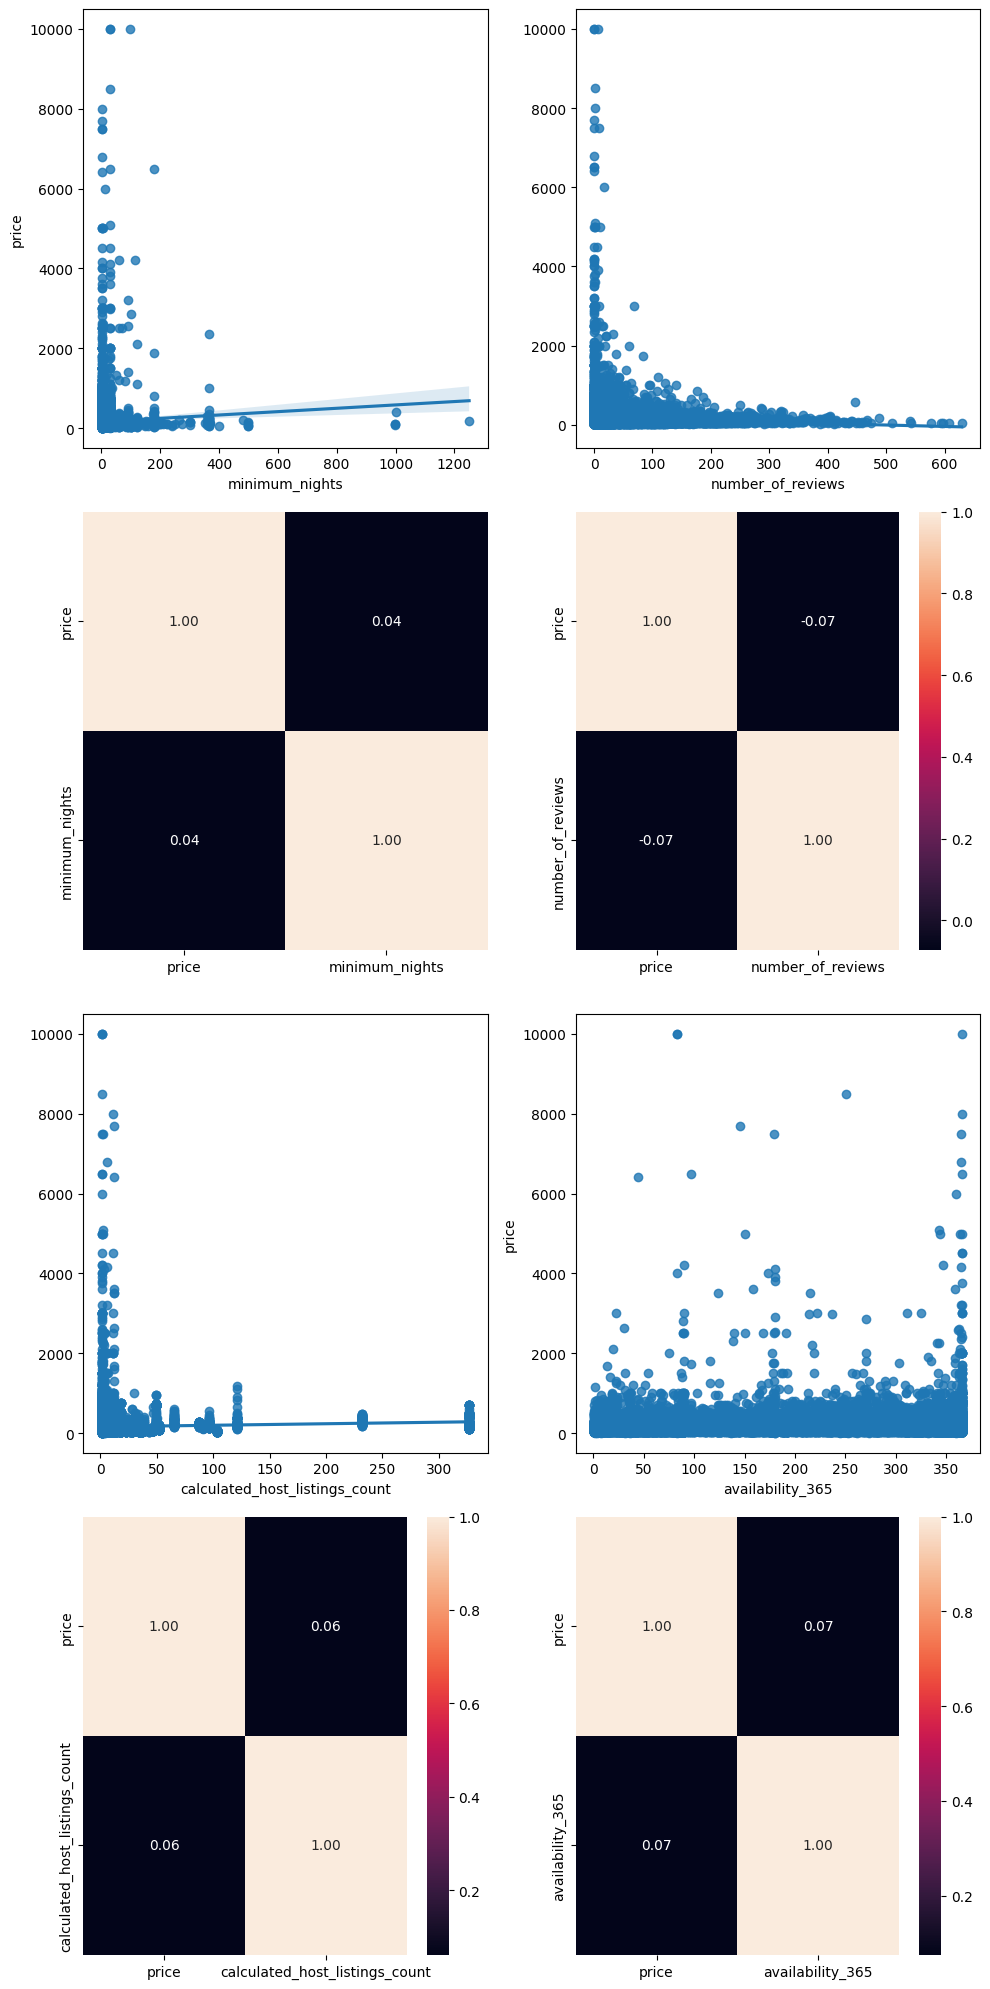

In [7]:
# Crear canvas de subplots con 5 filas 
fig, axis = plt.subplots(4, 2, figsize=(10, 20))  # Aumentamos la altura a 20

# Gráfico 1: minimum_nights vs price
sns.regplot(ax=axis[0, 0], data=data, x="minimum_nights", y="price")
sns.heatmap(data[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

# Gráfico 2: number_of_reviews vs price
sns.regplot(ax=axis[0, 1], data=data, x="number_of_reviews", y="price").set(ylabel=None)
sns.heatmap(data[["price", "number_of_reviews"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Gráfico 3: calculated_host_listings_count vs price
sns.regplot(ax=axis[2, 0], data=data, x="calculated_host_listings_count", y="price").set(ylabel=None)
sns.heatmap(data[["price", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0]).set(ylabel=None)

# Gráfico 4: availability_365 vs price
sns.regplot(ax=axis[2, 1], data=data, x="availability_365", y="price")
sns.heatmap(data[["price", "availability_365"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1])

# Ajustar diseño
plt.tight_layout()

# Mostrar
plt.show()

Mirando las correlaciones ponemos ver que:
- No tiene una relacion la cantidad de reviews con el precio.
- No existe relacion al aumentar el numero de noches con el precio.
- Al aumentar el numero de dias disponibles, deberia de aumentar el precio de los Airbnb para poder encontrar una relacion entre estas dos variables.
- No existe relacion entre la cantidad de propiedades que tiene un propietario con el precio.

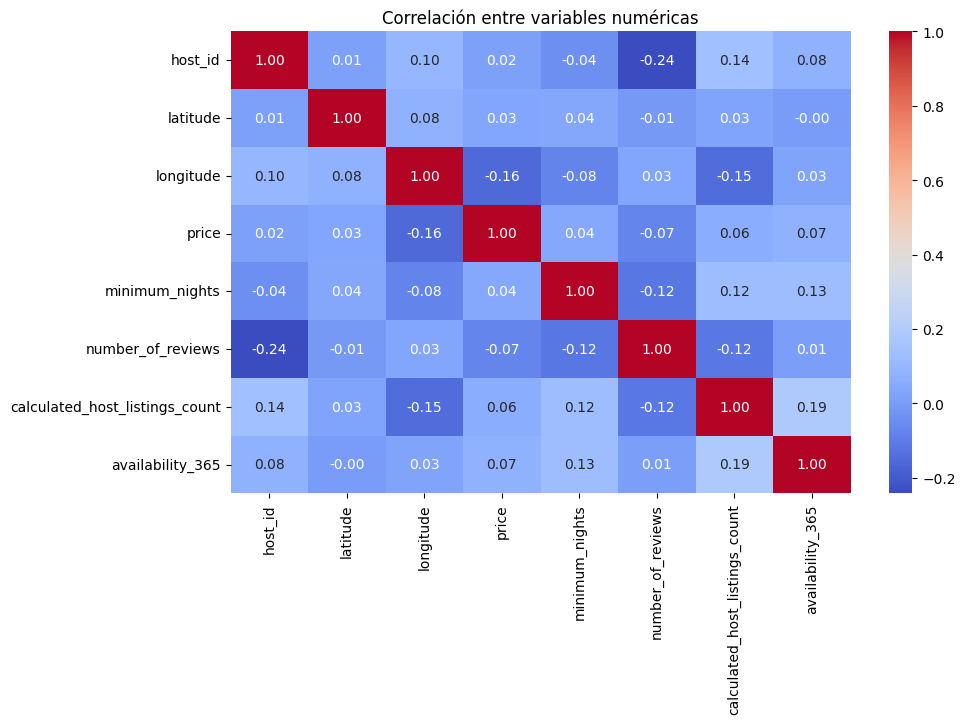

<Figure size 640x480 with 0 Axes>

In [8]:
#Análisis de variables multivariadas

# Seleccionar solo variables numéricas
numeric_df = data.select_dtypes(include=['int64', 'float64'])

# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre variables numéricas')
plt.show()
plt.savefig("Ver correlaciones entre variables numéricas.png", dpi=300)

Calculamos la correlacion entre las variables numericas. Como podemos ver no existe muha relacion entre variables numericas. procederemos a calcular la relacion entre las variables que mas nos interesan para nuestro analisis.


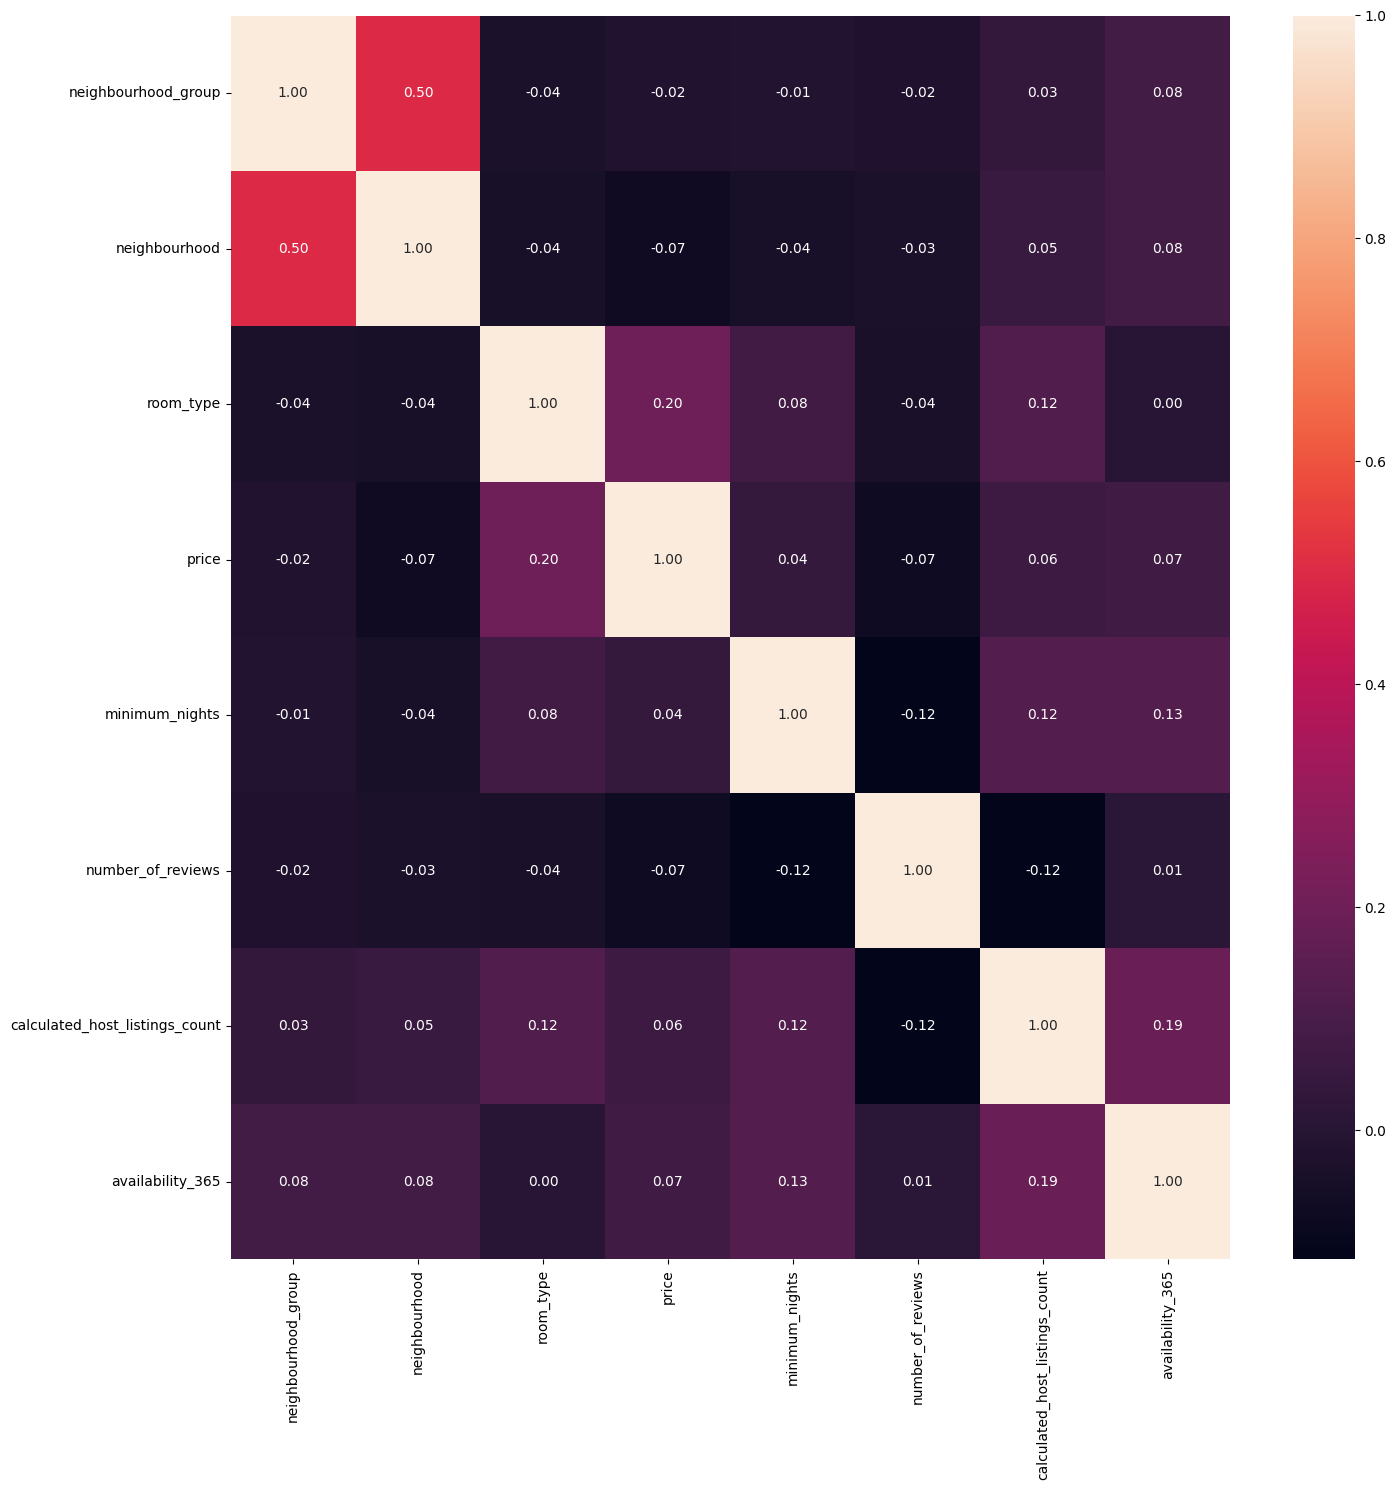

In [9]:
### Factorize the Room Type and Neighborhood Data
data1 = data.copy()
data2 = data.copy()
data1["room_type"] = pd.factorize(data["room_type"])[0]
data1["neighbourhood_group"] = pd.factorize(data["neighbourhood_group"])[0]
data1["neighbourhood"] = pd.factorize(data["neighbourhood"])[0]

# Ver el resultado

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(data1[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

Existe poca relacion entre las varibles del dataset, como para sacar alguna conclucion.

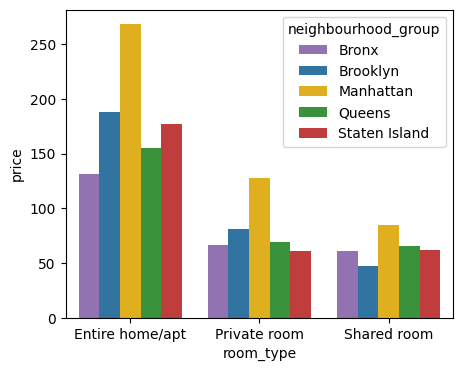

In [10]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(5, 4))

# Colores personalizados por grupo de vecindario
colores = {
    "Brooklyn": "#1f77b4",     # Azul suave 
    "Manhattan": "#ffbf00",    # Amarillo dorado 
    "Queens": "#2ca02c",       # Verde fuerte 
    "Staten Island": "#d62728",# Rojo clásico 
    "Bronx": "#9467bd" 
}

# Gráfico de precios promedios por grupos de vecindarios
avg_price = data.groupby(["room_type", "neighbourhood_group"])["price"].mean().reset_index()
sns.barplot(
    data=avg_price,
    x="room_type",
    y="price",
    hue="neighbourhood_group",
    palette=colores,
    ax=ax
)

# Mostrar el gráfico
plt.show()


- Este grafico nos muestra en promedio los precios mas caros por el tipo de habitacion. En este caso el grupo Manhattan tiene los precios mas caros por casa 
  completa, cuarto privado o cuarto compartido.

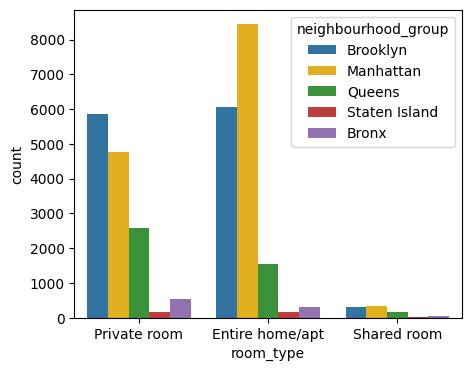

In [11]:
fig, axis = plt.subplots(figsize = (5, 4))

# Gráfico2 de conteo de  grupos de vencindarios 
sns.countplot(data = data, x = "room_type", hue = "neighbourhood_group",   palette=colores)

# Show the plot
plt.show()

1- Podemos concluir que el grupo Manhattan tiene mas inmuebles para rentar, en la categoria de casas completas o 
   apartamentos.

2- Brooklyn es el segundo grupo con mas propiedades y cuenta con mas cantidad de inmuebles por rentar de cuartos privados.

3- No existe tantos inmuebles de cuartos compartidos, esto puede ser debido a la demanda.


ANALISIS DE TODOS LOS DATOS

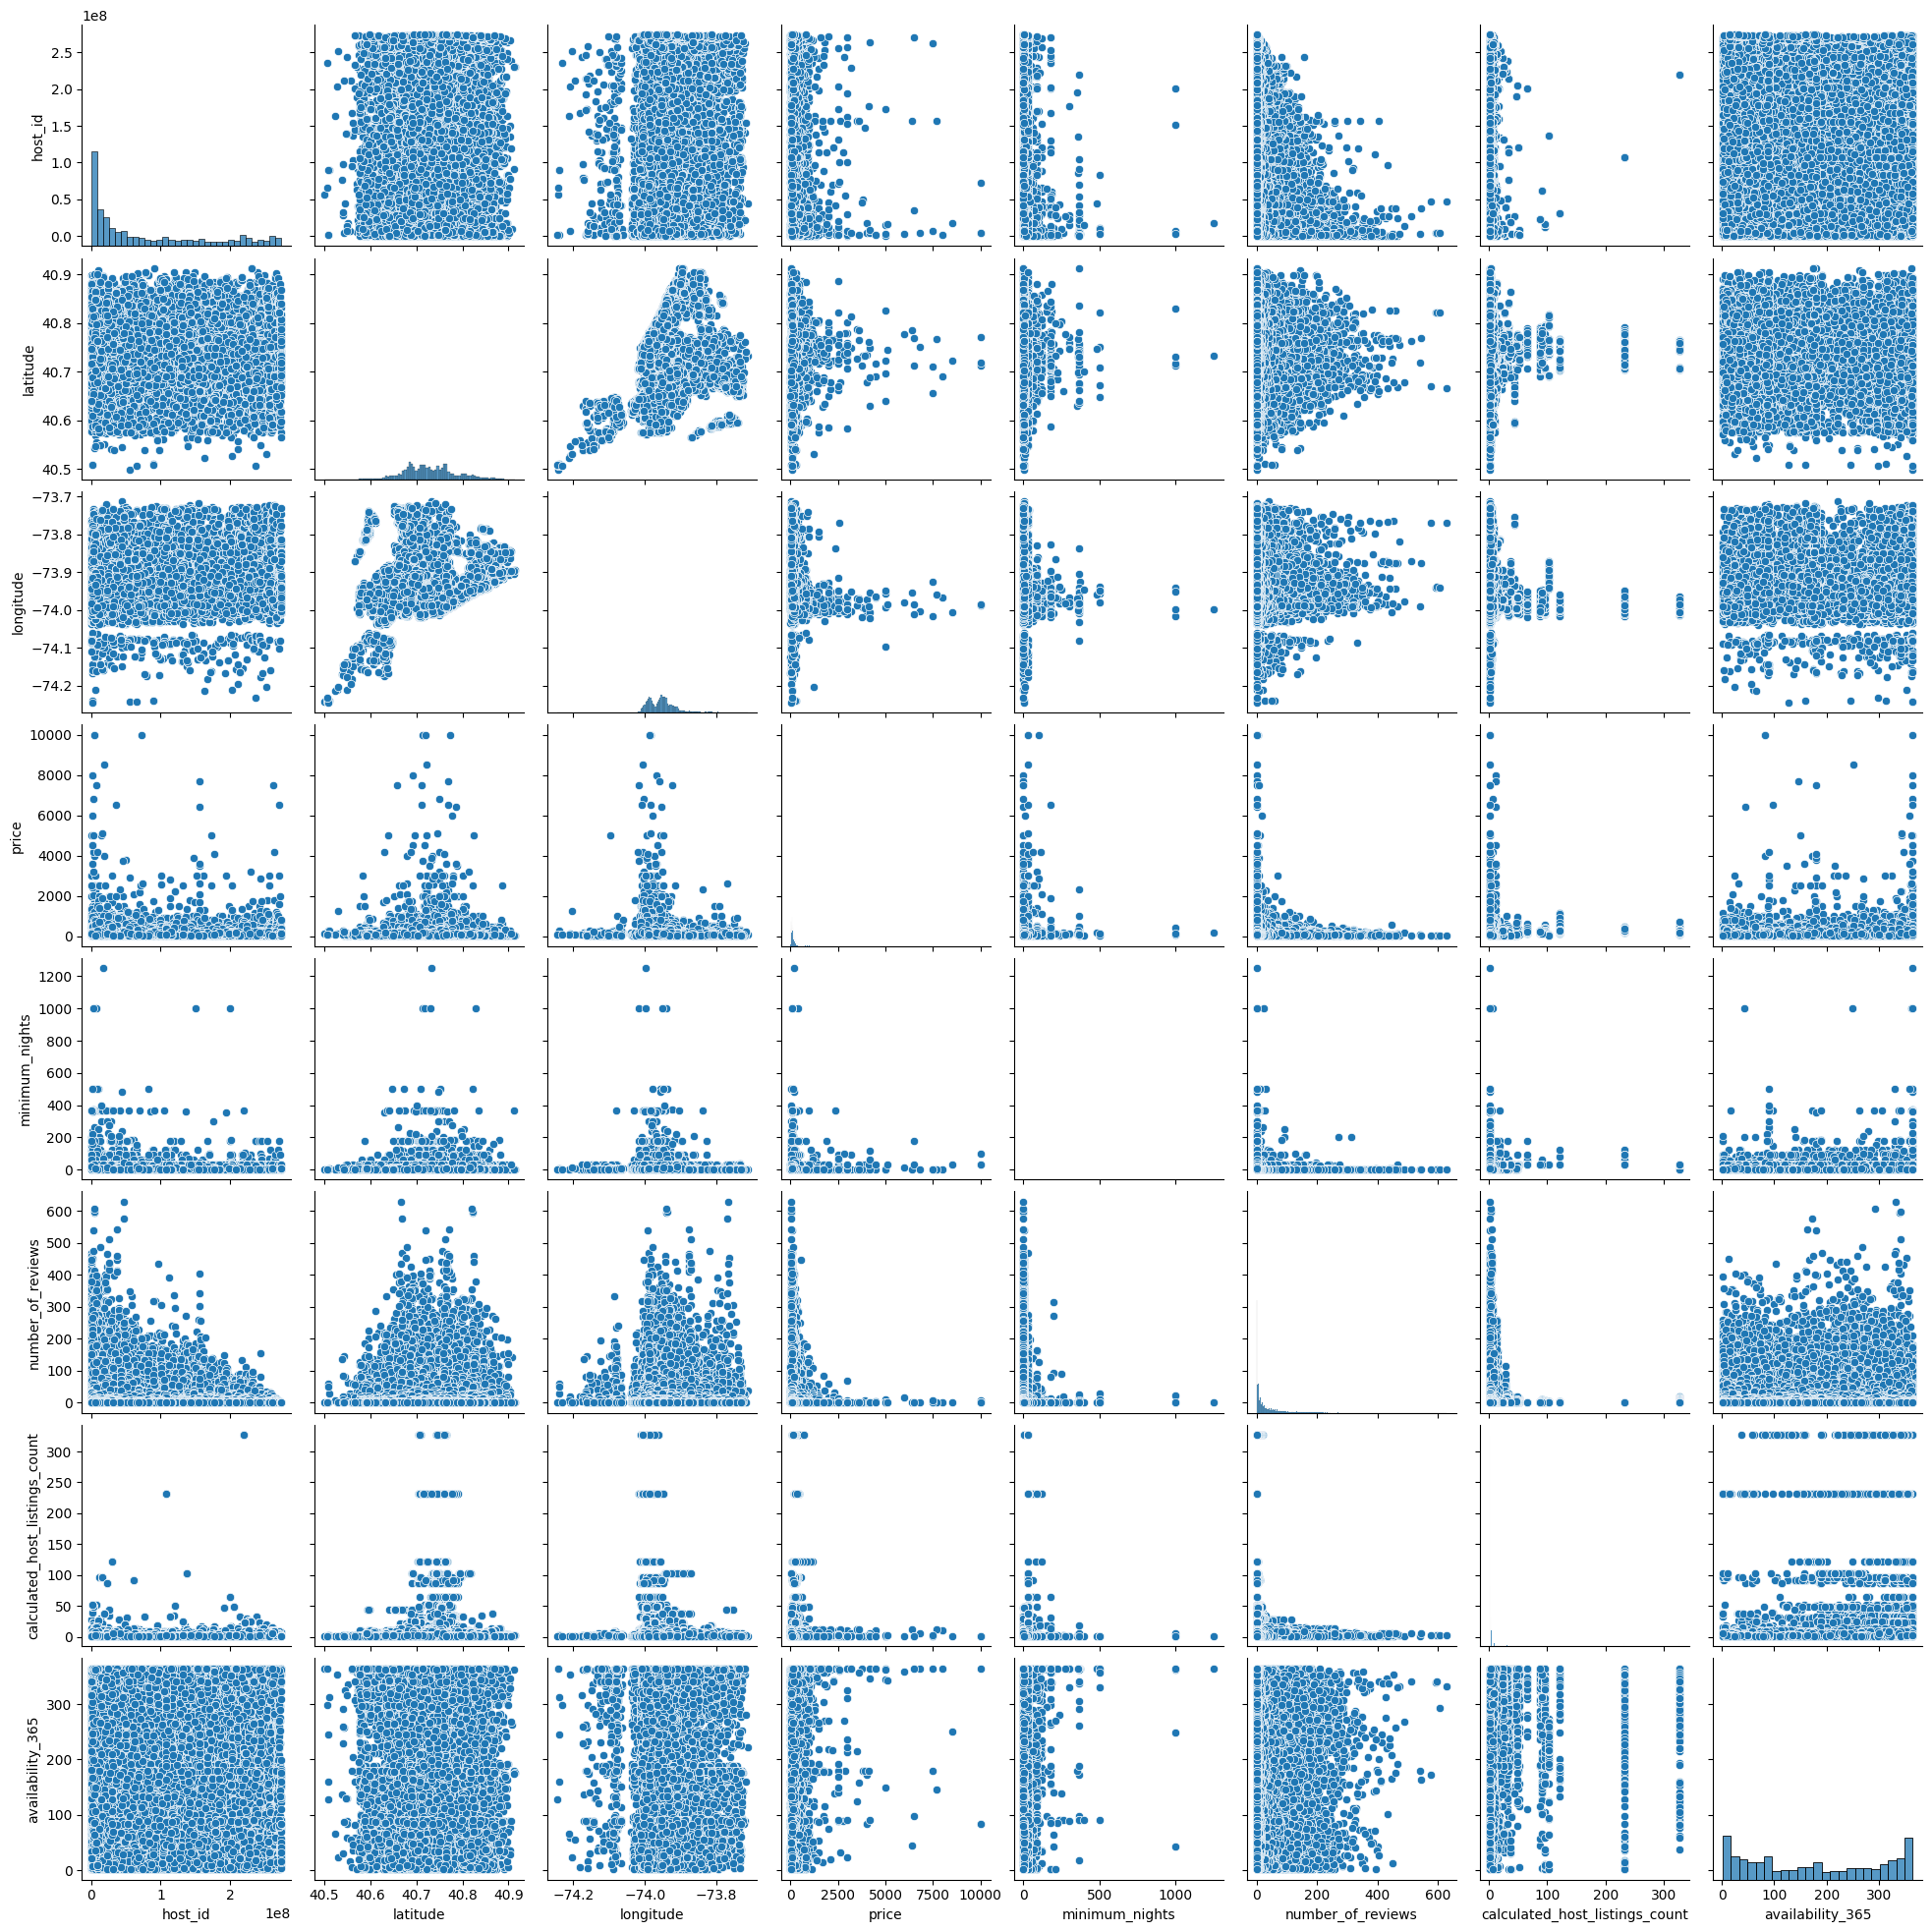

In [12]:
sns.pairplot(data = data)

Valores atipicos

In [13]:
data.describe()


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,3.135400e+04,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000
mean,8.145071e+07,40.728406,-73.948753,162.091822,8.338426,31.849365,10.335460,175.834439
std,8.673941e+07,0.056562,0.051400,254.444750,23.838961,51.638559,40.705488,126.195374
min,2.571000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,1.000000,1.000000
25%,8.619004e+06,40.688392,-73.983280,70.000000,2.000000,2.000000,1.000000,55.000000
50%,4.108975e+07,40.723725,-73.954115,112.000000,3.000000,10.000000,1.000000,168.000000
75%,1.452368e+08,40.763037,-73.930152,189.000000,5.000000,39.000000,3.000000,305.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


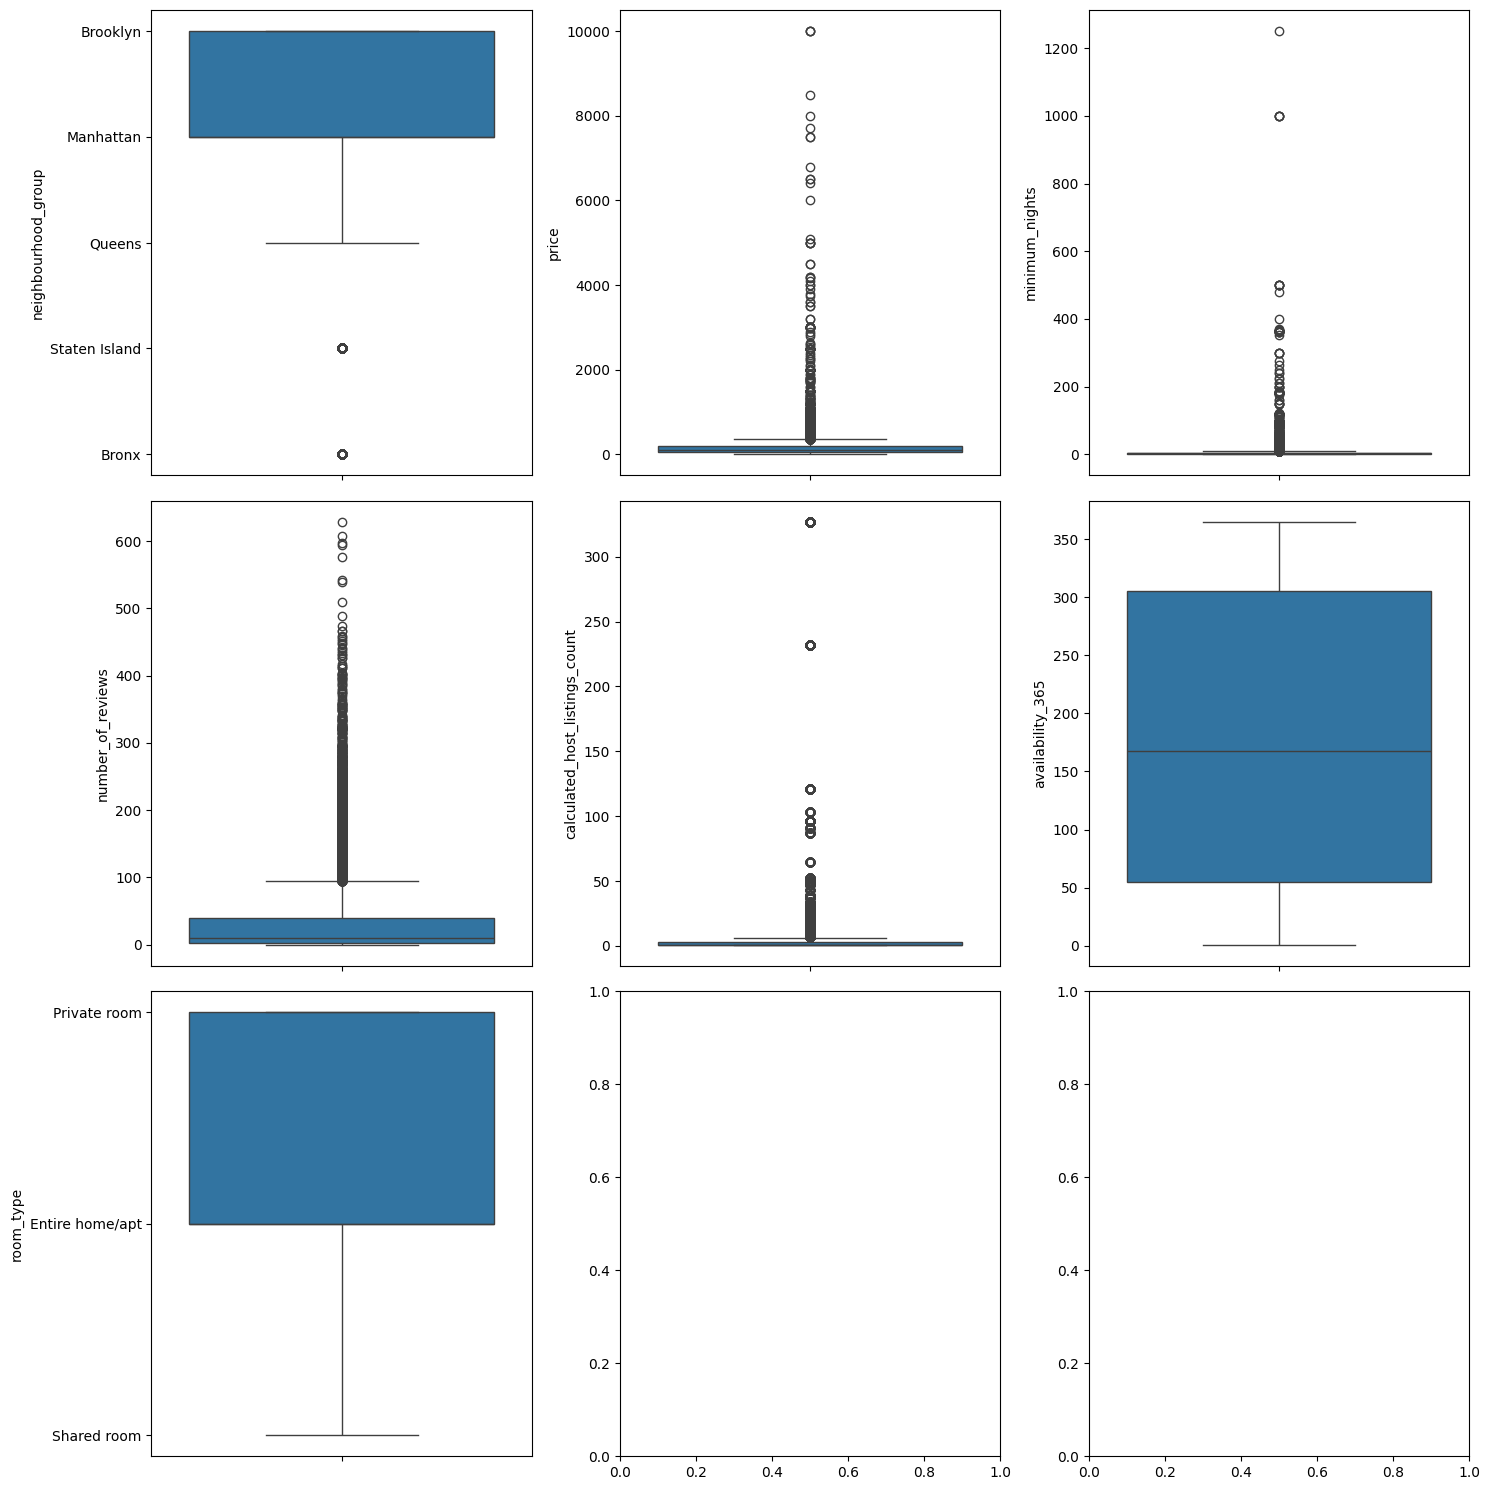

In [14]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = data, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = data, y = "price")
sns.boxplot(ax = axes[0, 2], data = data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = data, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = data, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = data, y = "room_type")

plt.tight_layout()

plt.show()

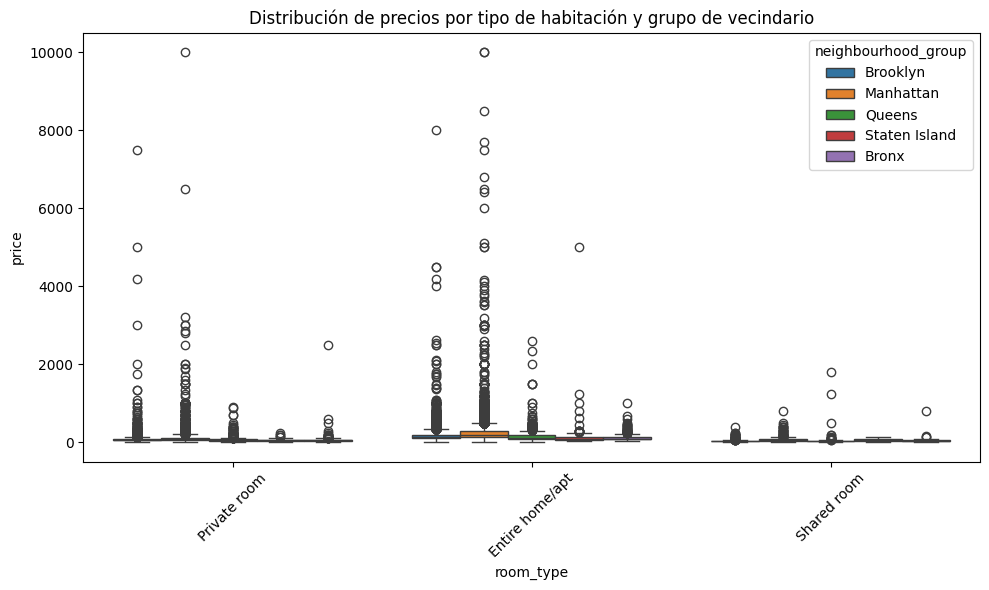

In [15]:
#"Distribución de precios por tipo de habitación y grupo de vecindario"
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="room_type", y="price", hue="neighbourhood_group")
plt.title("Distribución de precios por tipo de habitación y grupo de vecindario")
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.tight_layout()
plt.show()

Podemos ver los precios mas lejanos por grupo inmobiliario y el tipo de airbnb.

In [16]:
# 
estadisticos_precio = data["price"].describe()
estadisticos_precio

count    31354.000000
mean       162.091822
std        254.444750
min         10.000000
25%         70.000000
50%        112.000000
75%        189.000000
max      10000.000000
Name: price, dtype: float64

In [17]:
# Rango intercuartílico (IQR) para el precio

rango_iqr = estadisticos_precio["75%"] - estadisticos_precio["25%"]
limite_superior = estadisticos_precio["75%"] + 1.5 * rango_iqr
limite_inferior = estadisticos_precio["25%"] - 1.5 * rango_iqr

print(f"Los límites superior e inferior para detectar valores atípicos son {round(limite_superior, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(rango_iqr, 2)}")

Los límites superior e inferior para detectar valores atípicos son 367.5 y -108.5, con un rango intercuartílico de 119.0


In [18]:
#Limpieza de valores atipicos
data = data[data["price"] > 0]
count_0 = data[data["price"] == 0].shape[0]
count_1 = data[data["price"] == 1].shape[0]

print("Count of 0: ", count_0)
print("Count of 1: ", count_1)

Count of 0:  0
Count of 1:  0


Valores atipicos minimum_nights

In [19]:
noches_stats = data["minimum_nights"].describe()
noches_stats

count    31354.000000
mean         8.338426
std         23.838961
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [20]:
# Rango intercuartílico (IQR) para minimum_nights
rango_iqr_noches = noches_stats["75%"] - noches_stats["25%"]

limite_superior = noches_stats["75%"] + 1.5 * rango_iqr_noches
limite_inferior = noches_stats["25%"] - 1.5 * rango_iqr_noches

print(f"Los límites superior e inferior para detectar valores atípicos son {round(limite_superior, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(rango_iqr_noches, 2)}")

Los límites superior e inferior para detectar valores atípicos son 9.5 y -2.5, con un rango intercuartílico de 3.0


In [21]:
# Clean the outliers

data = data[data["minimum_nights"] <= 15]

In [22]:
count_0 = data[data["minimum_nights"] == 0].shape[0]
count_1 = data[data["minimum_nights"] == 1].shape[0]
count_2 = data[data["minimum_nights"] == 2].shape[0]
count_3 = data[data["minimum_nights"] == 3].shape[0]
count_4 = data[data["minimum_nights"] == 4].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)

Count of 0:  0
Count of 1:  7741
Count of 2:  7713
Count of 3:  5033
Count of 4:  1958


Detección de valores atípicos para number_of_reviews

In [23]:
review_stats = data["number_of_reviews"].describe()
review_stats

count    26485.000000
mean        36.127657
std         54.229648
min          0.000000
25%          3.000000
50%         14.000000
75%         47.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [24]:
# Rango intercuartílico (IQR) para number_of_reviews

rango_iqr_reviews = review_stats["75%"] - review_stats["25%"]

limite_superior = review_stats["75%"] + 1.5 * rango_iqr_reviews
limite_inferior = review_stats["25%"] - 1.5 * rango_iqr_reviews

print(f"Los límites superior e inferior para detectar valores atípicos son {round(limite_superior, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(rango_iqr_reviews, 2)}")

Los límites superior e inferior para detectar valores atípicos son 113.0 y -63.0, con un rango intercuartílico de 44.0


Detección de valores atípicos para calculated_host_listings_count

In [25]:
# Stats for calculated_host_listings_count

hostlist_stats = data["calculated_host_listings_count"].describe()
hostlist_stats

count    26485.000000
mean         4.709458
std         27.668847
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [26]:
# Rango intercuartílico (IQR) para el conteo de anuncios del anfitrión calculado

hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

limite_superior = hostlist_stats["75%"] + 1.5 * hostlist_iqr
limite_inferior = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"Los límites superior e inferior para detectar valores atípicos son {round(limite_superior, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(hostlist_iqr, 2)}")

Los límites superior e inferior para detectar valores atípicos son 3.5 y -0.5, con un rango intercuartílico de 1.0


In [27]:
count_04 = sum(1 for x in data["calculated_host_listings_count"] if x in range(0, 5))
count_1 = data[data["calculated_host_listings_count"] == 1].shape[0]
count_2 = data[data["calculated_host_listings_count"] == 2].shape[0]

print("Count of 0: ", count_04)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)

Count of 0:  23730
Count of 1:  15901
Count of 2:  4515


In [28]:
# limpiar datos atipicos

total_data = data[data["calculated_host_listings_count"] > 4]

In [29]:
# Count NaN
data.isnull().sum().sort_values(ascending = False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Escalado de características

In [30]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Copiamos el DataFrame para no modificar el original
data_escalada = data.copy()

# Codificamos las columnas categóricas con .map()
data["neighbourhood_group"] = data["neighbourhood_group"].map({
    'Bronx': 0, 
    'Brooklyn': 1, 
    'Manhattan': 2, 
    'Queens': 3, 
    'Staten Island': 4
})

data["room_type"] = data["room_type"].map({
    'Shared room': 0,
    'Private room': 1,
    'Entire home/apt': 2
})

# Lista de variables a escalar
num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]

# Escalado con MinMaxScaler
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data[num_variables])

# Crear DataFrame escalado
df_scal = pd.DataFrame(scal_features, index = data.index, columns = num_variables)

# Añadir la variable dependiente
df_scal["price"] = data["price"]

# Mostrar primeras filas
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.014308,0.000000,0.015337,1.000000,0.25,0.5,149
1,0.071542,0.000000,0.003067,0.972527,0.50,1.0,225
2,0.000000,0.142857,0.000000,1.000000,0.50,0.5,150
3,0.429253,0.000000,0.000000,0.530220,0.25,1.0,89
4,0.117647,0.142857,0.000000,0.351648,0.50,1.0,200


In [39]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type
0,0.000000,0.0,0.810440,1.0
1,0.000000,0.0,0.107143,0.5
2,0.142857,0.0,0.082418,1.0
3,0.000000,0.0,0.851648,0.5
4,0.285714,0.0,0.035714,0.0


In [32]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)